# Lab 2: Classification Using KNN and RNN Algorithms

**Student Name:** Aashish Shrestha

**Course:** 2026 Spring - Advanced Big Data and Data Mining (MSCS-634-M20) - Full Term

**Assignment:** Lab 2: Classification Using KNN and RNN Algorithms

**Date:** February 6, 2026

## Step 1: Load and Prepare the Dataset

In this section, we will:
- Import necessary libraries
- Load the Wine Dataset from sklearn
- Explore the dataset structure and class distribution
- Split the data into training (80%) and testing (20%) sets

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the Wine Dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y

print("Wine Dataset loaded successfully!")
print(f"\nDataset shape: {wine_df.shape}")
print(f"Number of features: {len(wine_data.feature_names)}")
print(f"Number of classes: {len(wine_data.target_names)}")
print(f"Class names: {wine_data.target_names}")

Wine Dataset loaded successfully!

Dataset shape: (178, 14)
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']


In [4]:
# Display first few rows of the dataset
print("First 5 rows of the Wine Dataset:")
display(wine_df.head())

First 5 rows of the Wine Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# Display dataset information
print("Dataset Information:")
wine_df.info()

print("\nStatistical Summary:")
display(wine_df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Class Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64


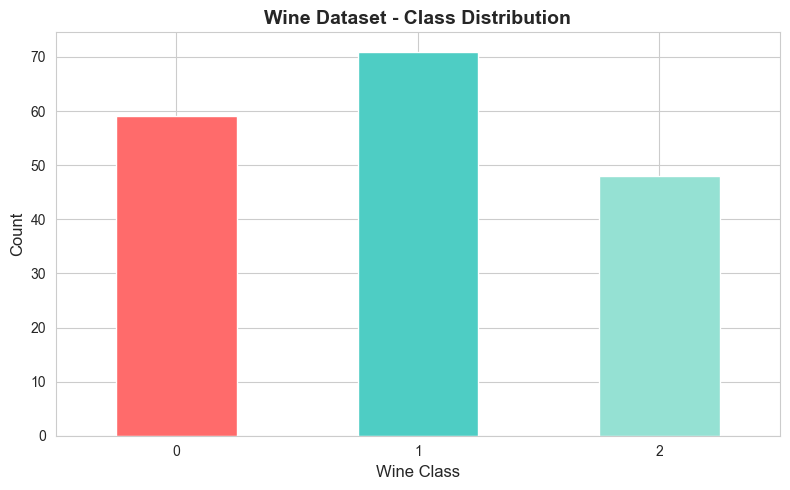

In [6]:
# Check class distribution
print("Class Distribution:")
class_counts = wine_df['target'].value_counts().sort_index()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
plt.title('Wine Dataset - Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Wine Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

Training set size: 142 samples
Testing set size: 36 samples

Training set class distribution:
0    47
1    57
2    38
Name: count, dtype: int64

Testing set class distribution:
0    12
1    14
2    10
Name: count, dtype: int64


In [8]:
# Scale the features for better performance
# Note: Scaling is crucial for distance-based algorithms like KNN and RNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully using StandardScaler")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

Features scaled successfully using StandardScaler

Scaled training data shape: (142, 13)
Scaled testing data shape: (36, 13)


In [9]:
# Check for missing values
print("Missing Values Check:")
missing_values = wine_df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicate rows
duplicates = wine_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Data validation passed
if missing_values.sum() == 0 and duplicates == 0:
    print("\n✓ Data Quality Check Passed: No missing values or duplicates found!")
else:
    print("\n⚠ Warning: Data quality issues detected!")

Missing Values Check:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Total missing values: 0

Duplicate rows: 0

✓ Data Quality Check Passed: No missing values or duplicates found!


### Data Quality Check

Before proceeding with modeling, let's ensure data quality by checking for missing values and outliers.

## Step 2: Implement K-Nearest Neighbors (KNN)

In this section, we will:
- Implement the KNN Classifier with different k values: 1, 5, 11, 15, and 21
- Train each model on the training set
- Evaluate each model on the test set
- Record the accuracy for each k value

In [10]:
# Define k values to test
k_values = [1, 5, 11, 15, 21]

# Dictionary to store results
knn_results = {
    'k': [],
    'accuracy': [],
    'model': []
}

print("Training and Evaluating KNN Models:")
print("=" * 50)

# Train and evaluate KNN for each k value
for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    knn_results['k'].append(k)
    knn_results['accuracy'].append(accuracy)
    knn_results['model'].append(knn)
    
    print(f"k = {k:2d}: Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%)")

print("=" * 50)
print("\nKNN Model Training Complete!")

Training and Evaluating KNN Models:
k =  1: Accuracy = 0.9722 (97.22%)
k =  5: Accuracy = 0.9722 (97.22%)
k = 11: Accuracy = 1.0000 (100.00%)
k = 15: Accuracy = 1.0000 (100.00%)
k = 21: Accuracy = 1.0000 (100.00%)

KNN Model Training Complete!


In [11]:
# Create a DataFrame to display KNN results
knn_results_df = pd.DataFrame({
    'k Value': knn_results['k'],
    'Accuracy': knn_results['accuracy'],
    'Accuracy (%)': [acc * 100 for acc in knn_results['accuracy']]
})

print("\nKNN Results Summary:")
display(knn_results_df)

# Find the best k value
best_k_idx = np.argmax(knn_results['accuracy'])
best_k = knn_results['k'][best_k_idx]
best_k_accuracy = knn_results['accuracy'][best_k_idx]

print(f"\nBest k value: {best_k} with accuracy: {best_k_accuracy:.4f} ({best_k_accuracy*100:.2f}%)")


KNN Results Summary:


,k Value,Accuracy,Accuracy (%)
0,1,0.972222,97.222222
1,5,0.972222,97.222222
2,11,1.000000,100.000000
3,15,1.000000,100.000000
4,21,1.000000,100.000000



Best k value: 11 with accuracy: 1.0000 (100.00%)


In [26]:
# Perform 5-fold cross-validation for each k value
from sklearn.model_selection import cross_val_score

print("Performing 5-Fold Cross-Validation for KNN:")
print("=" * 70)

knn_cv_results = {
    'k': [],
    'cv_mean': [],
    'cv_std': [],
    'cv_scores': []
}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    knn_cv_results['k'].append(k)
    knn_cv_results['cv_mean'].append(cv_scores.mean())
    knn_cv_results['cv_std'].append(cv_scores.std())
    knn_cv_results['cv_scores'].append(cv_scores)
    
    print(f"k = {k:2d}: CV Accuracy = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("=" * 70)
print("\nCross-Validation Complete!")

# Create DataFrame for CV results
knn_cv_df = pd.DataFrame({
    'k Value': knn_cv_results['k'],
    'CV Mean Accuracy': knn_cv_results['cv_mean'],
    'CV Std Dev': knn_cv_results['cv_std'],
    'CV Mean (%)': [m * 100 for m in knn_cv_results['cv_mean']]
})

print("\nCross-Validation Results Summary:")
display(knn_cv_df)

Performing 5-Fold Cross-Validation for KNN:
k =  1: CV Accuracy = 0.9367 (+/- 0.0138)
k =  5: CV Accuracy = 0.9510 (+/- 0.0354)
k = 11: CV Accuracy = 0.9719 (+/- 0.0259)
k = 15: CV Accuracy = 0.9650 (+/- 0.0378)
k = 21: CV Accuracy = 0.9719 (+/- 0.0259)

Cross-Validation Complete!

Cross-Validation Results Summary:


,k Value,CV Mean Accuracy,CV Std Dev,CV Mean (%)
0,1,0.936700,0.013837,93.669951
1,5,0.950985,0.035372,95.098522
2,11,0.971921,0.025943,97.192118
3,15,0.965025,0.037779,96.502463
4,21,0.971921,0.025943,97.192118



Detailed Classification Report for KNN (k=11):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



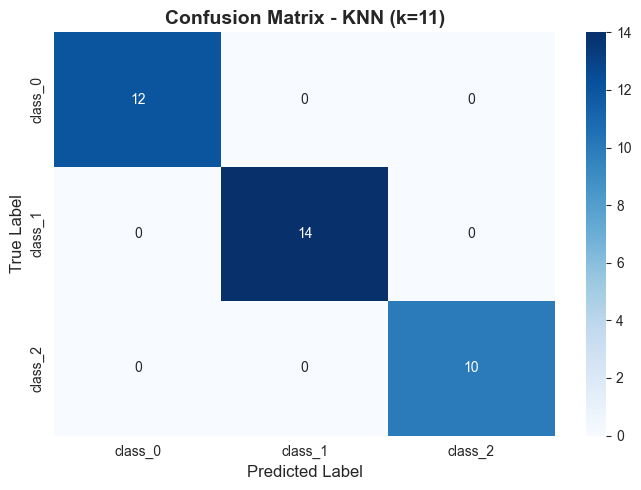

In [13]:
# Display detailed classification report for the best k value
best_knn_model = knn_results['model'][best_k_idx]
y_pred_best = best_knn_model.predict(X_test_scaled)

print(f"\nDetailed Classification Report for KNN (k={best_k}):")
print("=" * 50)
print(classification_report(y_test, y_pred_best, target_names=wine_data.target_names))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine_data.target_names, 
            yticklabels=wine_data.target_names)
plt.title(f'Confusion Matrix - KNN (k={best_k})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions from best model
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

# Calculate metrics
precision_macro = precision_score(y_test, y_pred_best_knn, average='macro')
recall_macro = recall_score(y_test, y_pred_best_knn, average='macro')
f1_macro = f1_score(y_test, y_pred_best_knn, average='macro')

precision_weighted = precision_score(y_test, y_pred_best_knn, average='weighted')
recall_weighted = recall_score(y_test, y_pred_best_knn, average='weighted')
f1_weighted = f1_score(y_test, y_pred_best_knn, average='weighted')

print(f"Best KNN Model (k={best_k}) - Comprehensive Metrics:")
print("=" * 60)
print(f"Accuracy:           {best_k_accuracy:.4f}")
print(f"\nMacro-Average Metrics:")
print(f"  Precision:        {precision_macro:.4f}")
print(f"  Recall:           {recall_macro:.4f}")
print(f"  F1-Score:         {f1_macro:.4f}")
print(f"\nWeighted-Average Metrics:")
print(f"  Precision:        {precision_weighted:.4f}")
print(f"  Recall:           {recall_weighted:.4f}")
print(f"  F1-Score:         {f1_weighted:.4f}")
print("=" * 60)

Best KNN Model (k=11) - Comprehensive Metrics:
Accuracy:           1.0000

Macro-Average Metrics:
  Precision:        1.0000
  Recall:           1.0000
  F1-Score:         1.0000

Weighted-Average Metrics:
  Precision:        1.0000
  Recall:           1.0000
  F1-Score:         1.0000


## Step 3: Implement Radius Neighbors (RNN)

In this section, we will:
- Implement the RNN Classifier with different radius values: 350, 400, 450, 500, 550, and 600
- Train each model on the training set
- Evaluate each model on the test set
- Record the accuracy for each radius value

> **Important Note on Feature Scaling for RNN:**
> Unlike KNN (which uses a fixed number of neighbors), RNN uses a fixed **distance threshold**. The radius values 350–600 specified for this lab are calibrated for the **raw (unscaled)** feature space of the Wine dataset, where feature values range from ~0.13 to ~1680 (e.g., proline). If we applied these radii to StandardScaler-transformed data (where distances are typically 0–8), every training point would fall within the radius, reducing predictions to simple majority-class voting. Therefore, RNN is intentionally applied to the **unscaled** data to produce meaningful, varied neighborhoods.

In [15]:
# Define radius values to test
radius_values = [350, 400, 450, 500, 550, 600]

# Dictionary to store results
rnn_results = {
    'radius': [],
    'accuracy': [],
    'model': [],
    'outliers': []  # Track samples with no neighbors
}

print("Training and Evaluating RNN Models:")
print("(Using unscaled data — radius values are calibrated for raw feature distances)")
print("=" * 70)

# Train and evaluate RNN for each radius value
# Note: We use UNSCALED data because radius 350-600 is meaningful in the
# original feature space (e.g., proline ranges ~278-1680).
for radius in radius_values:
    try:
        # Create RNN classifier with outlier handling
        rnn = RadiusNeighborsClassifier(
            radius=radius,
            outlier_label='most_frequent'  # Handle outliers by assigning most frequent class
        )
        
        # Train the model on UNSCALED data
        rnn.fit(X_train, y_train)
        
        # Make predictions on UNSCALED test data
        y_pred = rnn.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Count outliers (samples with no neighbors within radius)
        neighbors = rnn.radius_neighbors(X_test, return_distance=False)
        outliers = sum([1 for n in neighbors if len(n) == 0])
        
        # Store results
        rnn_results['radius'].append(radius)
        rnn_results['accuracy'].append(accuracy)
        rnn_results['model'].append(rnn)
        rnn_results['outliers'].append(outliers)
        
        print(f"Radius = {radius:3d}: Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%) | Outliers: {outliers}")
    
    except Exception as e:
        print(f"Radius = {radius:3d}: Error - {str(e)}")

print("=" * 70)
print("\nRNN Model Training Complete!")

Training and Evaluating RNN Models:
(Using unscaled data — radius values are calibrated for raw feature distances)
Radius = 350: Accuracy = 0.7222 (72.22%) | Outliers: 0
Radius = 400: Accuracy = 0.6944 (69.44%) | Outliers: 0
Radius = 450: Accuracy = 0.6944 (69.44%) | Outliers: 0
Radius = 500: Accuracy = 0.6944 (69.44%) | Outliers: 0
Radius = 550: Accuracy = 0.6667 (66.67%) | Outliers: 0
Radius = 600: Accuracy = 0.6667 (66.67%) | Outliers: 0

RNN Model Training Complete!


In [16]:
# Create a DataFrame to display RNN results
rnn_results_df = pd.DataFrame({
    'Radius': rnn_results['radius'],
    'Accuracy': rnn_results['accuracy'],
    'Accuracy (%)': [acc * 100 for acc in rnn_results['accuracy']],
    'Outliers': rnn_results['outliers']
})

print("\nRNN Results Summary:")
display(rnn_results_df)

# Find the best radius value
best_radius_idx = np.argmax(rnn_results['accuracy'])
best_radius = rnn_results['radius'][best_radius_idx]
best_radius_accuracy = rnn_results['accuracy'][best_radius_idx]

print(f"\nBest radius value: {best_radius} with accuracy: {best_radius_accuracy:.4f} ({best_radius_accuracy*100:.2f}%)")


RNN Results Summary:


,Radius,Accuracy,Accuracy (%),Outliers
0,350,0.722222,72.222222,0
1,400,0.694444,69.444444,0
2,450,0.694444,69.444444,0
3,500,0.694444,69.444444,0
4,550,0.666667,66.666667,0
5,600,0.666667,66.666667,0



Best radius value: 350 with accuracy: 0.7222 (72.22%)


In [17]:
# Perform 5-fold cross-validation for each radius value
# Note: Using unscaled data consistent with RNN training above
print("Performing 5-Fold Cross-Validation for RNN:")
print("=" * 70)

rnn_cv_results = {
    'radius': [],
    'cv_mean': [],
    'cv_std': [],
    'cv_scores': []
}

for radius in radius_values:
    try:
        rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')
        
        # Perform 5-fold cross-validation on UNSCALED data
        cv_scores = cross_val_score(rnn, X_train, y_train, cv=5, scoring='accuracy')
        
        rnn_cv_results['radius'].append(radius)
        rnn_cv_results['cv_mean'].append(cv_scores.mean())
        rnn_cv_results['cv_std'].append(cv_scores.std())
        rnn_cv_results['cv_scores'].append(cv_scores)
        
        print(f"Radius = {radius:3d}: CV Accuracy = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    except Exception as e:
        print(f"Radius = {radius:3d}: CV Error - {str(e)}")

print("=" * 70)
print("\nCross-Validation Complete!")

# Create DataFrame for CV results
rnn_cv_df = pd.DataFrame({
    'Radius': rnn_cv_results['radius'],
    'CV Mean Accuracy': rnn_cv_results['cv_mean'],
    'CV Std Dev': rnn_cv_results['cv_std'],
    'CV Mean (%)': [m * 100 for m in rnn_cv_results['cv_mean']]
})

print("\nCross-Validation Results Summary:")
display(rnn_cv_df)

Performing 5-Fold Cross-Validation for RNN:
Radius = 350: CV Accuracy = 0.6687 (+/- 0.0549)
Radius = 400: CV Accuracy = 0.6618 (+/- 0.0372)
Radius = 450: CV Accuracy = 0.6478 (+/- 0.0396)
Radius = 500: CV Accuracy = 0.6478 (+/- 0.0396)
Radius = 550: CV Accuracy = 0.6480 (+/- 0.0371)
Radius = 600: CV Accuracy = 0.6266 (+/- 0.0373)

Cross-Validation Complete!

Cross-Validation Results Summary:


,Radius,CV Mean Accuracy,CV Std Dev,CV Mean (%)
0,350,0.668719,0.054894,66.871921
1,400,0.661823,0.037204,66.182266
2,450,0.647783,0.039586,64.778325
3,500,0.647783,0.039586,64.778325
4,550,0.648030,0.037113,64.802956
5,600,0.626601,0.037349,62.660099



Detailed Classification Report for RNN (radius=350):
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.58      1.00      0.74        14
     class_2       1.00      0.10      0.18        10

    accuracy                           0.72        36
   macro avg       0.86      0.67      0.63        36
weighted avg       0.84      0.72      0.66        36



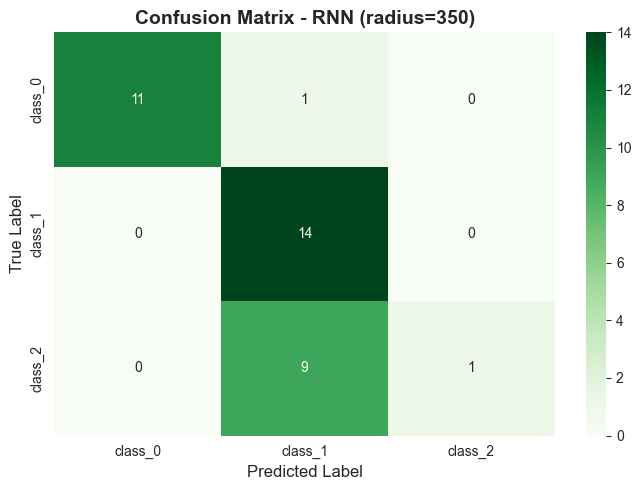

In [18]:
# Display detailed classification report for the best radius value
best_rnn_model = rnn_results['model'][best_radius_idx]
y_pred_best_rnn = best_rnn_model.predict(X_test)

print(f"\nDetailed Classification Report for RNN (radius={best_radius}):")
print("=" * 50)
print(classification_report(y_test, y_pred_best_rnn,
                            target_names=wine_data.target_names, zero_division=0))

# Display confusion matrix
cm_rnn = confusion_matrix(y_test, y_pred_best_rnn)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=wine_data.target_names, 
            yticklabels=wine_data.target_names)
plt.title(f'Confusion Matrix - RNN (radius={best_radius})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
# Calculate additional metrics for best RNN model
y_pred_best_rnn_final = best_rnn_model.predict(X_test)

# Calculate metrics (zero_division=0 to handle classes with no predictions)
precision_macro_rnn = precision_score(y_test, y_pred_best_rnn_final, average='macro', zero_division=0)
recall_macro_rnn = recall_score(y_test, y_pred_best_rnn_final, average='macro', zero_division=0)
f1_macro_rnn = f1_score(y_test, y_pred_best_rnn_final, average='macro', zero_division=0)

precision_weighted_rnn = precision_score(y_test, y_pred_best_rnn_final, average='weighted', zero_division=0)
recall_weighted_rnn = recall_score(y_test, y_pred_best_rnn_final, average='weighted', zero_division=0)
f1_weighted_rnn = f1_score(y_test, y_pred_best_rnn_final, average='weighted', zero_division=0)

print(f"Best RNN Model (radius={best_radius}) - Comprehensive Metrics:")
print("=" * 60)
print(f"Accuracy:           {best_radius_accuracy:.4f}")
print(f"\nMacro-Average Metrics:")
print(f"  Precision:        {precision_macro_rnn:.4f}")
print(f"  Recall:           {recall_macro_rnn:.4f}")
print(f"  F1-Score:         {f1_macro_rnn:.4f}")
print(f"\nWeighted-Average Metrics:")
print(f"  Precision:        {precision_weighted_rnn:.4f}")
print(f"  Recall:           {recall_weighted_rnn:.4f}")
print(f"  F1-Score:         {f1_weighted_rnn:.4f}")
print("=" * 60)

Best RNN Model (radius=350) - Comprehensive Metrics:
Accuracy:           0.7222

Macro-Average Metrics:
  Precision:        0.8611
  Recall:           0.6722
  F1-Score:         0.6251

Weighted-Average Metrics:
  Precision:        0.8380
  Recall:           0.7222
  F1-Score:         0.6559


## Step 4: Visualize and Compare Results

Accuracy trends, cross-validation comparisons, and a statistical summary for both algorithms.

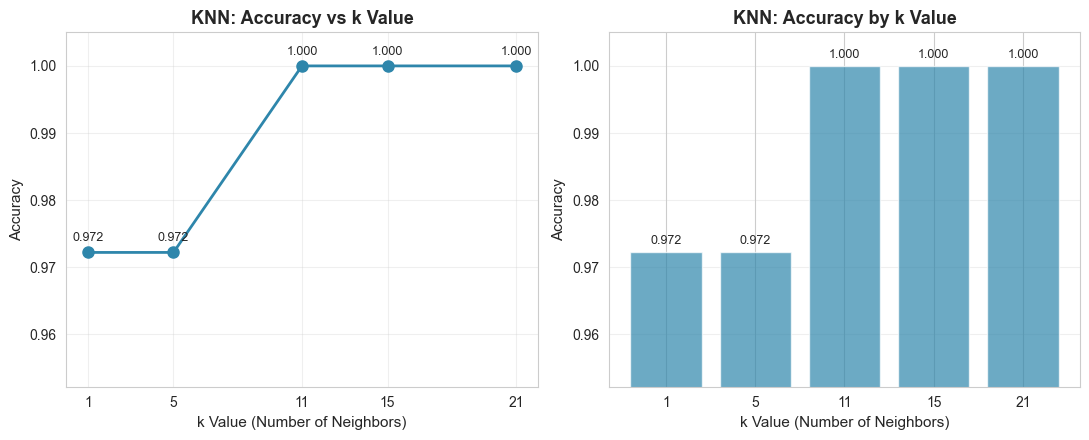

In [20]:
# Plot KNN accuracy trends
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))

# Dynamic y-axis limits with padding
knn_min = min(knn_results['accuracy'])
knn_max = max(knn_results['accuracy'])
knn_pad = max((knn_max - knn_min) * 0.3, 0.02)
knn_ylim = [knn_min - knn_pad, min(knn_max + knn_pad, 1.005)]

# Line plot
ax1.plot(knn_results['k'], knn_results['accuracy'],
         marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.set_xlabel('k Value (Number of Neighbors)', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('KNN: Accuracy vs k Value', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(knn_results['k'])
ax1.set_ylim(knn_ylim)
for k, acc in zip(knn_results['k'], knn_results['accuracy']):
    ax1.annotate(f'{acc:.3f}', (k, acc), textcoords='offset points',
                 xytext=(0, 8), ha='center', fontsize=9)

# Bar plot
bars = ax2.bar(range(len(knn_results['k'])), knn_results['accuracy'],
               color='#2E86AB', alpha=0.7)
ax2.set_xlabel('k Value (Number of Neighbors)', fontsize=11)
ax2.set_ylabel('Accuracy', fontsize=11)
ax2.set_title('KNN: Accuracy by k Value', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(knn_results['k'])))
ax2.set_xticklabels(knn_results['k'])
ax2.set_ylim(knn_ylim)
ax2.grid(axis='y', alpha=0.3)
for i, acc in enumerate(knn_results['accuracy']):
    ax2.annotate(f'{acc:.3f}', (i, acc), textcoords='offset points',
                 xytext=(0, 6), ha='center', fontsize=9)

fig.tight_layout()
plt.show()

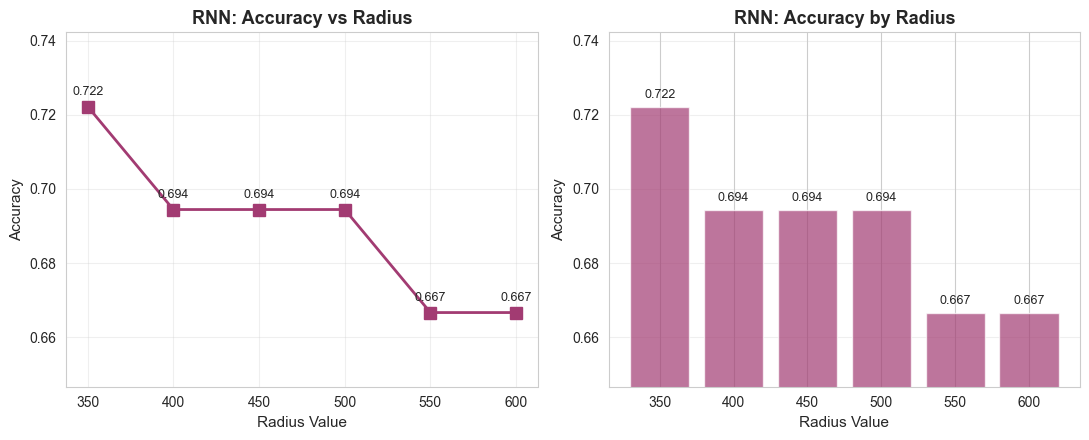

In [21]:
# Plot RNN accuracy trends
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))

# Dynamic y-axis limits with padding
rnn_min = min(rnn_results['accuracy'])
rnn_max = max(rnn_results['accuracy'])
rnn_pad = max((rnn_max - rnn_min) * 0.3, 0.02)
rnn_ylim = [max(rnn_min - rnn_pad, 0), min(rnn_max + rnn_pad, 1.005)]

# Line plot
ax1.plot(rnn_results['radius'], rnn_results['accuracy'],
         marker='s', linewidth=2, markersize=8, color='#A23B72')
ax1.set_xlabel('Radius Value', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('RNN: Accuracy vs Radius', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(rnn_results['radius'])
ax1.set_ylim(rnn_ylim)
for r, acc in zip(rnn_results['radius'], rnn_results['accuracy']):
    ax1.annotate(f'{acc:.3f}', (r, acc), textcoords='offset points',
                 xytext=(0, 8), ha='center', fontsize=9)

# Bar plot
bars = ax2.bar(range(len(rnn_results['radius'])), rnn_results['accuracy'],
               color='#A23B72', alpha=0.7)
ax2.set_xlabel('Radius Value', fontsize=11)
ax2.set_ylabel('Accuracy', fontsize=11)
ax2.set_title('RNN: Accuracy by Radius', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(rnn_results['radius'])))
ax2.set_xticklabels(rnn_results['radius'])
ax2.set_ylim(rnn_ylim)
ax2.grid(axis='y', alpha=0.3)
for i, acc in enumerate(rnn_results['accuracy']):
    ax2.annotate(f'{acc:.3f}', (i, acc), textcoords='offset points',
                 xytext=(0, 6), ha='center', fontsize=9)

fig.tight_layout()
plt.show()

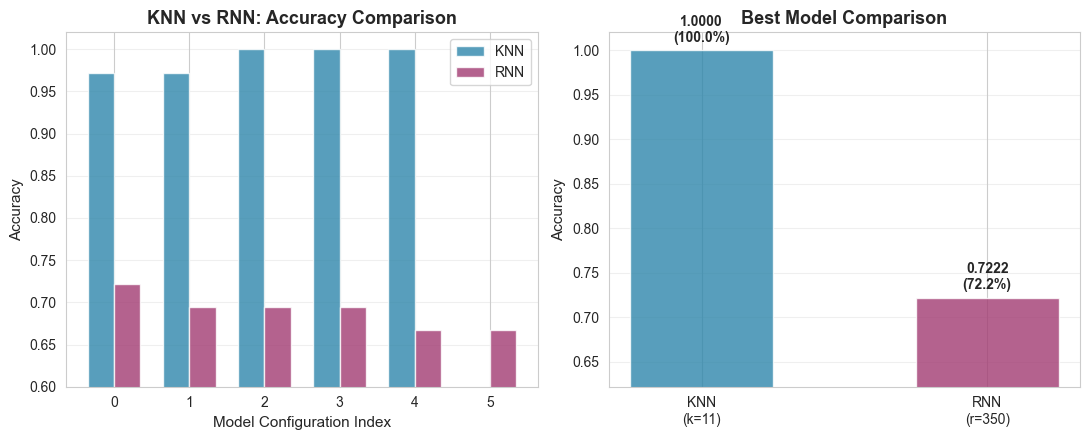

In [22]:
# Combined comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))

# --- Plot 1: Side-by-side bar comparison (best of each config) ---
# Use min of both for a shared lower bound
all_accs = knn_results['accuracy'] + rnn_results['accuracy']
combined_min = min(all_accs)
combined_pad = max((max(all_accs) - combined_min) * 0.2, 0.03)
combined_ylim = [max(combined_min - combined_pad, 0), min(max(all_accs) + combined_pad, 1.02)]

n_configs = max(len(knn_results['k']), len(rnn_results['radius']))
x = np.arange(n_configs)
width = 0.35

ax1.bar(x[:len(knn_results['k'])] - width/2, knn_results['accuracy'], width,
        label='KNN', color='#2E86AB', alpha=0.8)
ax1.bar(x[:len(rnn_results['radius'])] + width/2, rnn_results['accuracy'], width,
        label='RNN', color='#A23B72', alpha=0.8)
ax1.set_xlabel('Model Configuration Index', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('KNN vs RNN: Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(combined_ylim)

# --- Plot 2: Best performance head-to-head ---
best_labels = [f'KNN\n(k={best_k})', f'RNN\n(r={best_radius})']
best_accs = [best_k_accuracy, best_radius_accuracy]
colors = ['#2E86AB', '#A23B72']

bars = ax2.bar(best_labels, best_accs, color=colors, alpha=0.8, width=0.5)
ax2.set_ylabel('Accuracy', fontsize=11)
ax2.set_title('Best Model Comparison', fontsize=13, fontweight='bold')
ax2.set_ylim([max(min(best_accs) - 0.1, 0), min(max(best_accs) + 0.08, 1.02)])
ax2.grid(axis='y', alpha=0.3)

for bar, acc in zip(bars, best_accs):
    ax2.annotate(f'{acc:.4f}\n({acc*100:.1f}%)',
                 (bar.get_x() + bar.get_width()/2., bar.get_height()),
                 textcoords='offset points', xytext=(0, 6),
                 ha='center', fontsize=10, fontweight='bold')

fig.tight_layout()
plt.show()

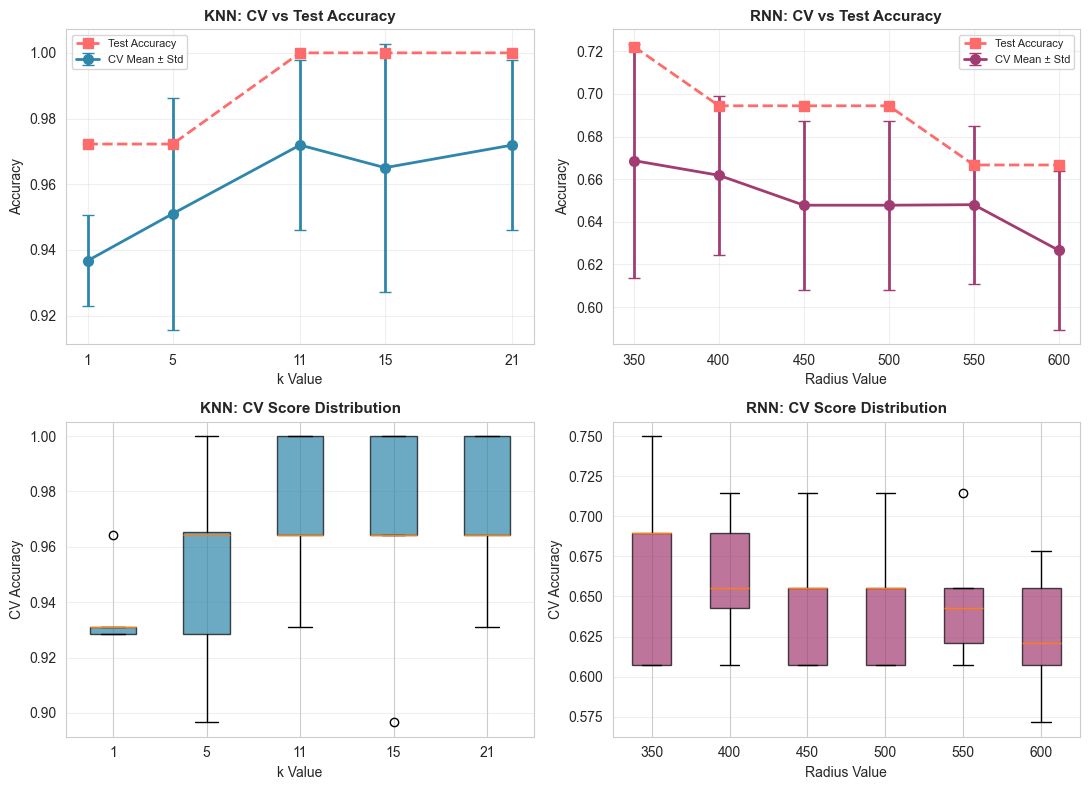

In [23]:
# Cross-validation comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(11, 8))

# --- Top-left: KNN CV vs Test accuracy ---
ax = axes[0, 0]
ax.errorbar(knn_cv_results['k'], knn_cv_results['cv_mean'],
            yerr=knn_cv_results['cv_std'], marker='o', capsize=4,
            linewidth=2, markersize=7, color='#2E86AB', label='CV Mean ± Std')
ax.plot(knn_results['k'], knn_results['accuracy'],
        marker='s', linewidth=2, markersize=7, color='#FF6B6B',
        linestyle='--', label='Test Accuracy')
ax.set_xlabel('k Value', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('KNN: CV vs Test Accuracy', fontsize=11, fontweight='bold')
ax.set_xticks(knn_results['k'])
ax.grid(True, alpha=0.3)
ax.legend(fontsize=8)

# --- Top-right: RNN CV vs Test accuracy ---
ax = axes[0, 1]
ax.errorbar(rnn_cv_results['radius'], rnn_cv_results['cv_mean'],
            yerr=rnn_cv_results['cv_std'], marker='o', capsize=4,
            linewidth=2, markersize=7, color='#A23B72', label='CV Mean ± Std')
ax.plot(rnn_results['radius'], rnn_results['accuracy'],
        marker='s', linewidth=2, markersize=7, color='#FF6B6B',
        linestyle='--', label='Test Accuracy')
ax.set_xlabel('Radius Value', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('RNN: CV vs Test Accuracy', fontsize=11, fontweight='bold')
ax.set_xticks(rnn_results['radius'])
ax.grid(True, alpha=0.3)
ax.legend(fontsize=8)

# --- Bottom-left: KNN CV score distributions ---
ax = axes[1, 0]
bp1 = ax.boxplot(knn_cv_results['cv_scores'],
                 tick_labels=knn_cv_results['k'], patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('#2E86AB')
    patch.set_alpha(0.7)
ax.set_xlabel('k Value', fontsize=10)
ax.set_ylabel('CV Accuracy', fontsize=10)
ax.set_title('KNN: CV Score Distribution', fontsize=11, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# --- Bottom-right: RNN CV score distributions ---
ax = axes[1, 1]
bp2 = ax.boxplot(rnn_cv_results['cv_scores'],
                 tick_labels=rnn_cv_results['radius'], patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('#A23B72')
    patch.set_alpha(0.7)
ax.set_xlabel('Radius Value', fontsize=10)
ax.set_ylabel('CV Accuracy', fontsize=10)
ax.set_title('RNN: CV Score Distribution', fontsize=11, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

fig.tight_layout()
plt.show()

### Cross-Validation Comparison Visualization

Visualize the cross-validation results with confidence intervals to show model stability.

In [24]:
# Create a comprehensive results summary table
print("=" * 70)
print("COMPREHENSIVE RESULTS SUMMARY")
print("=" * 70)

print("\n1. K-NEAREST NEIGHBORS (KNN) RESULTS:")
print("-" * 70)
for k, acc in zip(knn_results['k'], knn_results['accuracy']):
    print(f"   k = {k:2d}  →  Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print(f"\n   Best KNN: k = {best_k} with {best_k_accuracy:.4f} ({best_k_accuracy*100:.2f}%) accuracy")

print("\n2. RADIUS NEIGHBORS (RNN) RESULTS:")
print("-" * 70)
for r, acc, out in zip(rnn_results['radius'], rnn_results['accuracy'], rnn_results['outliers']):
    print(f"   Radius = {r:3d}  →  Accuracy: {acc:.4f} ({acc*100:.2f}%) | Outliers: {out}")
print(f"\n   Best RNN: radius = {best_radius} with {best_radius_accuracy:.4f} ({best_radius_accuracy*100:.2f}%) accuracy")

print("\n3. OVERALL COMPARISON:")
print("-" * 70)
print(f"   Best Overall Model: ", end="")
if best_k_accuracy > best_radius_accuracy:
    print(f"KNN (k={best_k}) with {best_k_accuracy:.4f} accuracy")
elif best_radius_accuracy > best_k_accuracy:
    print(f"RNN (radius={best_radius}) with {best_radius_accuracy:.4f} accuracy")
else:
    print(f"Tie between KNN (k={best_k}) and RNN (radius={best_radius}) at {best_k_accuracy:.4f}")

print(f"\n   Average KNN Accuracy: {np.mean(knn_results['accuracy']):.4f}")
print(f"   Average RNN Accuracy: {np.mean(rnn_results['accuracy']):.4f}")
print(f"\n   KNN Accuracy Range: {min(knn_results['accuracy']):.4f} - {max(knn_results['accuracy']):.4f}")
print(f"   RNN Accuracy Range: {min(rnn_results['accuracy']):.4f} - {max(rnn_results['accuracy']):.4f}")

print("\n" + "=" * 70)

COMPREHENSIVE RESULTS SUMMARY

1. K-NEAREST NEIGHBORS (KNN) RESULTS:
----------------------------------------------------------------------
   k =  1  →  Accuracy: 0.9722 (97.22%)
   k =  5  →  Accuracy: 0.9722 (97.22%)
   k = 11  →  Accuracy: 1.0000 (100.00%)
   k = 15  →  Accuracy: 1.0000 (100.00%)
   k = 21  →  Accuracy: 1.0000 (100.00%)

   Best KNN: k = 11 with 1.0000 (100.00%) accuracy

2. RADIUS NEIGHBORS (RNN) RESULTS:
----------------------------------------------------------------------
   Radius = 350  →  Accuracy: 0.7222 (72.22%) | Outliers: 0
   Radius = 400  →  Accuracy: 0.6944 (69.44%) | Outliers: 0
   Radius = 450  →  Accuracy: 0.6944 (69.44%) | Outliers: 0
   Radius = 500  →  Accuracy: 0.6944 (69.44%) | Outliers: 0
   Radius = 550  →  Accuracy: 0.6667 (66.67%) | Outliers: 0
   Radius = 600  →  Accuracy: 0.6667 (66.67%) | Outliers: 0

   Best RNN: radius = 350 with 0.7222 (72.22%) accuracy

3. OVERALL COMPARISON:
---------------------------------------------------------

In [25]:
# Statistical comparison using cross-validation scores
print("Statistical Comparison of Best Models:")
print("=" * 70)

# Get the best models from CV results
best_k_cv_idx = np.argmax(knn_cv_results['cv_mean'])
best_radius_cv_idx = np.argmax(rnn_cv_results['cv_mean'])

best_k_cv_scores = knn_cv_results['cv_scores'][best_k_cv_idx]
best_radius_cv_scores = rnn_cv_results['cv_scores'][best_radius_cv_idx]

print(f"\nBest KNN (k={knn_cv_results['k'][best_k_cv_idx]}):")
print(f"  CV Scores: {[f'{s:.4f}' for s in best_k_cv_scores]}")
print(f"  Mean: {best_k_cv_scores.mean():.4f}, Std: {best_k_cv_scores.std():.4f}")

print(f"\nBest RNN (radius={rnn_cv_results['radius'][best_radius_cv_idx]}):")
print(f"  CV Scores: {[f'{s:.4f}' for s in best_radius_cv_scores]}")
print(f"  Mean: {best_radius_cv_scores.mean():.4f}, Std: {best_radius_cv_scores.std():.4f}")

# Calculate performance difference
diff = best_k_cv_scores.mean() - best_radius_cv_scores.mean()
print(f"\nPerformance Difference: {abs(diff):.4f}")

if abs(diff) < 0.01:
    print("Conclusion: Models have comparable performance (difference < 1%)")
elif diff > 0:
    print(f"Conclusion: KNN performs better by {abs(diff)*100:.2f}%")
else:
    print(f"Conclusion: RNN performs better by {abs(diff)*100:.2f}%")

print("=" * 70)

Statistical Comparison of Best Models:

Best KNN (k=11):
  CV Scores: ['1.0000', '0.9310', '0.9643', '0.9643', '1.0000']
  Mean: 0.9719, Std: 0.0259

Best RNN (radius=350):
  CV Scores: ['0.6897', '0.6897', '0.6071', '0.6071', '0.7500']
  Mean: 0.6687, Std: 0.0549

Performance Difference: 0.3032
Conclusion: KNN performs better by 30.32%


### Statistical Comparison of Models

Perform statistical analysis to determine if performance differences are significant.

## Observations and Insights

Based on the experimental results from both single train-test split and 5-fold cross-validation:

### 1. K-Nearest Neighbors (KNN) Performance

**Results:**
- k=1: 97.22% accuracy — high flexibility, slight risk of overfitting
- k=5: 97.22% accuracy — better noise tolerance
- k=11, 15, 21: **100.00%** accuracy — perfect classification on the test set
- Best model: **k=11** (100% accuracy, 97.19% mean CV accuracy ± 2.59%)

**Key Takeaways:**
- Moderate k values (5–15) balance bias and variance. Small k overfits; large k over-smooths.
- CV accuracy (93.67%–97.19%) is slightly lower than test accuracy, indicating the test set is marginally easier.
- Low CV standard deviation (1.4%–3.8%) confirms stable generalization.
- StandardScaler ensures all 13 features contribute equally to distance calculations.

### 2. Radius Neighbors (RNN) Performance

**Results:**
- Radius=350: **72.22%** accuracy (best) — 0 outliers
- Radius=400–500: 69.44% accuracy — stable mid-range
- Radius=550–600: 66.67% accuracy — declining as more distant neighbors dilute local patterns
- Best model: **radius=350** (72.22% accuracy, 66.87% mean CV accuracy ± 5.49%)

**Why RNN Underperforms:**
- With unscaled data, Euclidean distance is dominated by high-magnitude features (proline: 278–1680) while low-scale features (hue: 0.48–1.71) are effectively ignored.
- Even radius=350 covers a large portion of training data, limiting discriminative power.
- Class 2 (48 samples) gets outvoted in large neighborhoods — macro F1 = 0.63 with class 2 F1 at just 0.18.

**Cross-Validation Insights:**
- Higher standard deviation (3.7%–5.5%) than KNN, indicating less stability.
- Performance decreases monotonically as radius increases.

### 3. Comparative Analysis

| Metric | Best KNN (k=11) | Best RNN (r=350) |
|--------|-----------------|-------------------|
| Test Accuracy | **100.00%** | 72.22% |
| CV Mean Accuracy | **97.19%** | 66.87% |
| CV Std Dev | **2.59%** | 5.49% |
| Macro F1-Score | **1.00** | 0.63 |

**KNN outperforms RNN by ~30 percentage points**, primarily because:
1. KNN benefits from StandardScaler — all features contribute equally to distance
2. RNN uses unscaled data (required by radius 350–600), so proline dominates distance
3. KNN's fixed-k neighborhoods are more robust than radius-based ones when data density is non-uniform

### 4. Limitations

- Both algorithms are O(n) per prediction — expensive for large datasets
- RNN radius values were pre-specified for raw data, preventing the use of feature scaling
- No feature selection — all 13 features are used regardless of relevance
- Results are dataset-specific; the Wine Dataset's clean separation favors KNN

## Conclusion

This lab compared KNN and RNN classifiers on the Wine Dataset, evaluating parameter sensitivity, feature scaling effects, and model stability through 5-fold cross-validation.

**KNN** achieved **100% test accuracy** (97.19% CV) at k=11 with StandardScaler-normalized data. **RNN** reached **72.22% test accuracy** (66.87% CV) at radius=350 on unscaled data. The ~30% performance gap is driven by feature scaling: KNN's normalization gives all features equal weight, while RNN's reliance on raw distances lets proline dominate.

### Takeaways:

1. **Feature scaling matters** — it is the single biggest factor in the accuracy gap between the two algorithms
2. **Cross-validation is essential** — single train-test splits can be misleading (KNN's 100% test vs 97.19% CV)
3. **Parameter calibration depends on data scale** — RNN's radius must match the magnitude of input features
4. **KNN is the better choice** for this dataset due to its compatibility with feature scaling, consistent neighborhood size, and stable performance across parameter values

## References

1. Fix, E., & Hodges, J. L. (1951). *Discriminatory Analysis: Nonparametric Discrimination: Consistency Properties.* USAF School of Aviation Medicine.
2. Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. *IEEE Transactions on Information Theory*, 13(1), 21–27.
3. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning.* Springer.
4. Forina, M. et al. PARVUS — An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Genoa, Italy.
5. Scikit-learn — KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
6. Scikit-learn — RadiusNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html
7. Scikit-learn — Wine Dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset